<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리
> 결정트리 알고리즘을 사용해 새로운 분류 문제를 다루어 봅니다. 

> 결정 트리가 머신러닝 문제를 어떻게 해결하는지 이해합니다.

In [ ]:
# 데이터 불러오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# 데이터 프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는데 유용
# 누락된 값이 있다면 그 데이터를 버리거나 평균값으로 채운 후 사용(훈련세트의 평균값으로 채워야함)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 열에 대한 간단한 통계 출력(최소, 최대, 평균값 등)
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 훈련 데이터와 테스트 데이터 분류
from sklearn.model_selection import train_test_split
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, test_size = 0.2, random_state = 42)

In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 로지스틱 회귀로 훈련 후 정확도 확인(과소적합)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target),lr.score(test_scaled, test_target)

(0.7808350971714451, 0.7776923076923077)

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


결정트리 - 데이터를 설명하기 쉽다.

In [ ]:
# 결정트리 모델 훈련 후 정확도 확인(테스트 정확도가 낮다.)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target), dt.score(test_scaled, test_target)

(0.996921300750433, 0.8592307692307692)

<function matplotlib.pyplot.show>

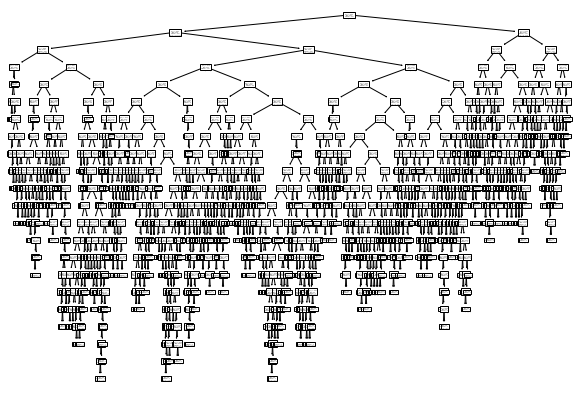

In [ ]:
# 결정트리 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show

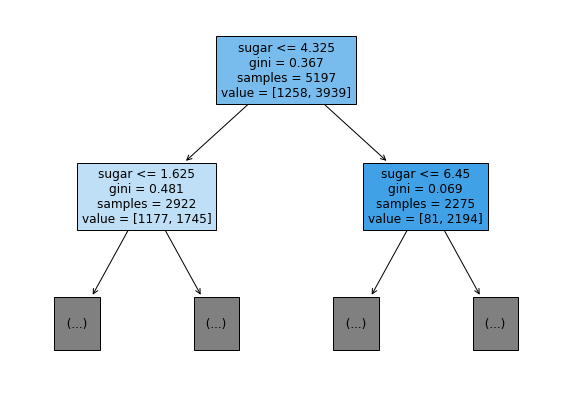

In [ ]:
# 깊이를 1까지만 출력
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### 지니 불순도
- DecisionTreeClassifier 클래스의 criterion 매개변수의 기본 값이 **'gini'**
- 계산 방법 : 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
- 어떤 노드의 두 클래스의 비율이 정확히 1/2라면 지니 불순도는 0.5가 되어 최악이다.

- 순수 노드 : 노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작을 때

#### 정보 이득
- 부모와 자식 노드 사이의 불순도 차이
- 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도
- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴

#### 엔트로피 불순도
- DecisionTreeClassifiere 클래스에서 criterion = **'entropy'**를 지정
- -음성 클래서 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)

#### 가지치기
- 끝까지 자라나는 트리(훈련 세트에는 잘 맞지만 테스트 세트에서는 부족 -> 일반화가 잘 안됨)가 되기전에 가지치기 필요
- 트리의 최대깊이 지정 : max_depth = "원하는 깊이"

In [ ]:
# 깊이 3까지만 출력(가지치기)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target), dt.score(test_scaled, test_target)

(0.8454877814123533, 0.8415384615384616)

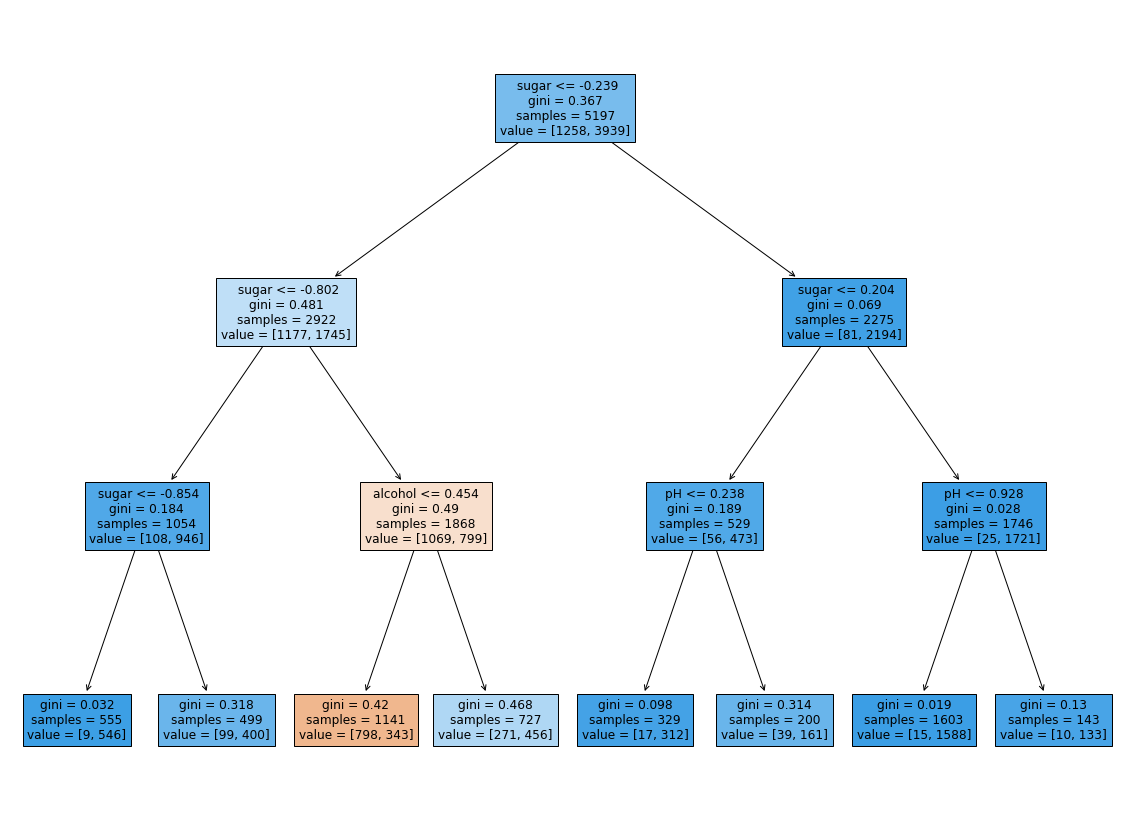

In [ ]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', ' sugar', 'pH'])
plt.show()

In [ ]:
# 결정트리는 특성값의 스케일이 영향을 미치지 않으므로 표준화 전처리 불필요
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)

(0.8454877814123533, 0.8415384615384616)

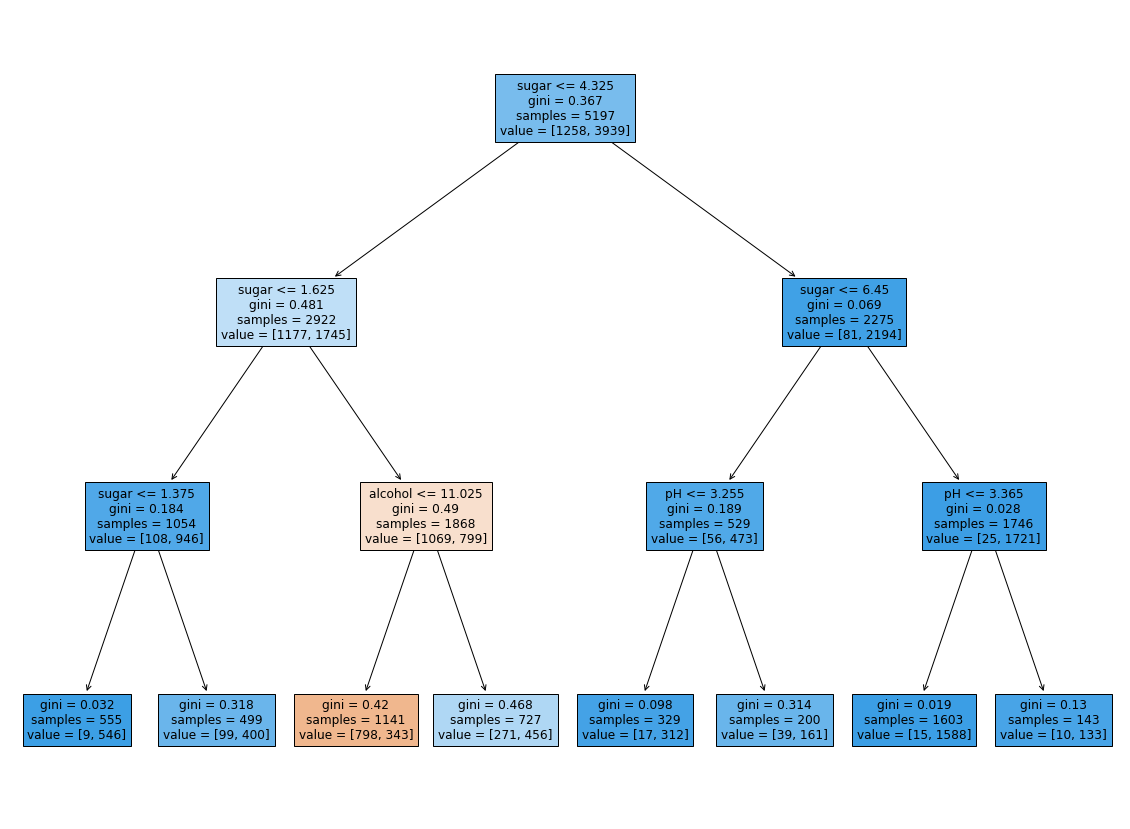

In [ ]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성 중요도 계산(당도가 가장 큰 비율 차지)
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])